# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [3]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    margx = (x_lim[1] - x_lim[0])/grid[0]/2
    margy = (y_lim[1] - y_lim[0])/grid[1]/2
    xLin = np.linspace(x_lim[0] + margx, x_lim[1] - margx, num = grid[0])
    yLin = np.linspace(y_lim[0] + margy, y_lim[1] - margy, num = grid[1])
    x, y = np.meshgrid(xLin, yLin)
    x = x.flatten() + random_component*np.random.uniform(-margx, margx, grid[0]*grid[1])
    y = y.flatten() + random_component*np.random.uniform(-margy, margy, grid[0]*grid[1])
    return pd.DataFrame({"X" : x, "Y" : y})

#### b) Wygenerowanie procesu

In [4]:
df1 = regular_on_rectangle([20, 10], 0.5, [0, 20], [0, 10])

#### c) Wizualizacja

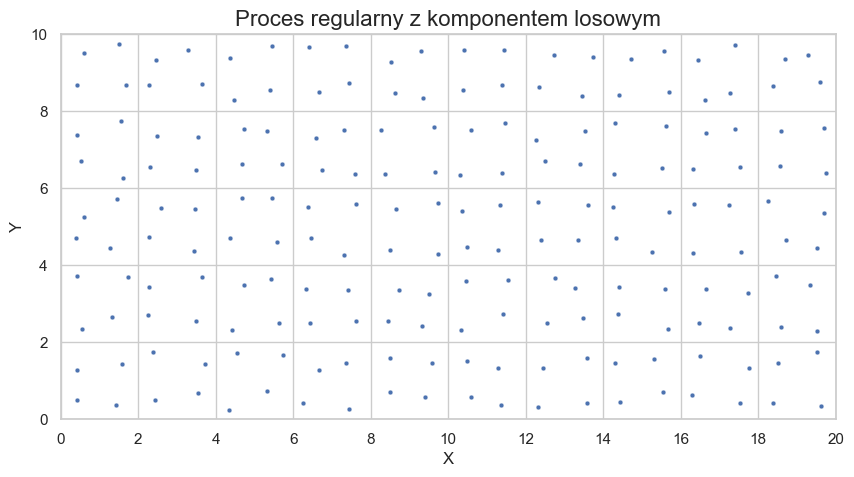

In [5]:
sns.scatterplot(data = df1, x = "X", y = "Y", s = 12)
res = plt.title("Proces regularny z komponentem losowym", fontsize = 16)
res = plt.axis([0, 20, 0, 10])
res = plt.xticks(np.arange(0, 21, 2))

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [6]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    n = np.random.poisson(intensity*(x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)
    return pd.DataFrame({"X" : x, "Y" : y})

#### b) Wygenerowanie procesu

In [7]:
df2 = homogeneous_poisson_on_rectangle(10, [0, 20], [0, 10])

#### c) Wizualizacja

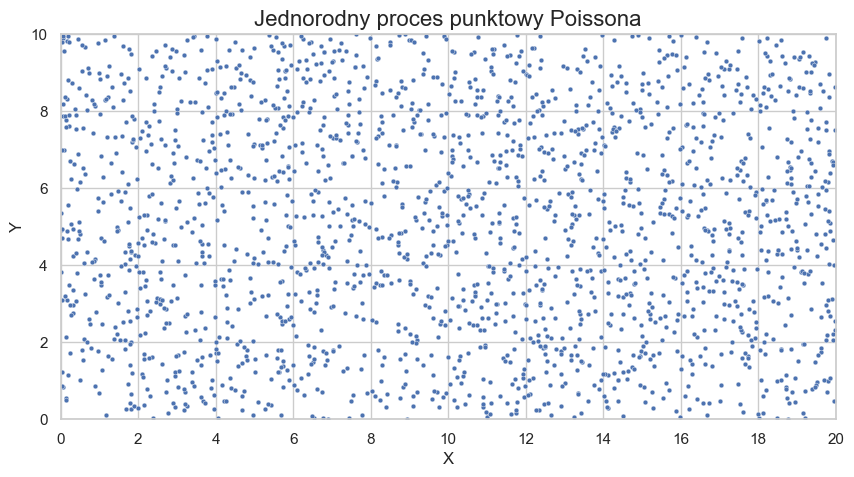

In [8]:
sns.scatterplot(data = df2, x = "X", y = "Y", s = 12)
res = plt.title("Jednorodny proces punktowy Poissona", fontsize = 16)
res = plt.axis([0, 20, 0, 10])
res = plt.xticks(np.arange(0, 21, 2))

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [9]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    optRes = sp.optimize.minimize(lambda args: -intensity_function(args), [np.mean(x_lim), np.mean(y_lim)], bounds = (x_lim, y_lim))
    homogeneous_intensity = intensity_function(optRes.x)
    
    df = homogeneous_poisson_on_rectangle(homogeneous_intensity, x_lim, y_lim)
    
    intensity = intensity_function((df["X"], df["Y"]))
    prob = 1 - intensity/homogeneous_intensity
    leave = prob < np.random.rand(len(df))
    return df[leave]

#### b) Wygenerowanie procesu

In [10]:
df3 = unhomogeneous_poisson_on_rectangle(lambda xy : xy[0], [0, 20], [0, 10])

#### c) Wizualizacja

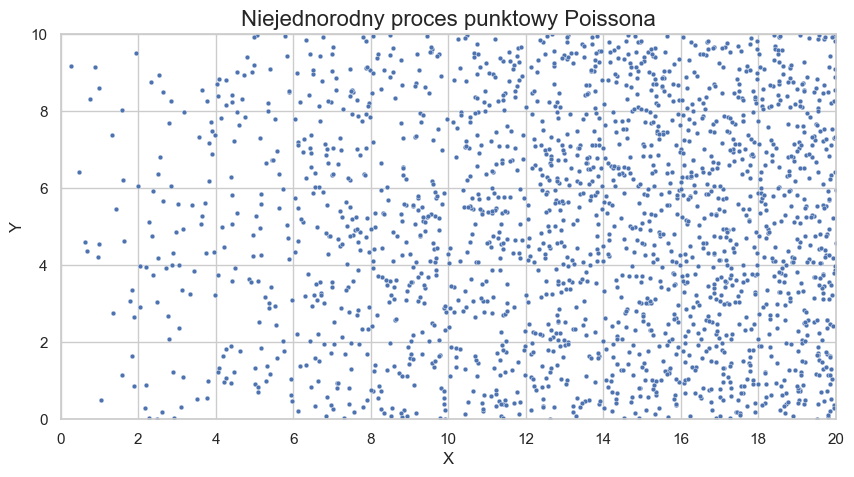

In [11]:
sns.scatterplot(data = df3, x = "X", y = "Y", s = 12)
res = plt.title("Niejednorodny proces punktowy Poissona", fontsize = 16)
res = plt.axis([0, 20, 0, 10])
res = plt.xticks(np.arange(0, 21, 2))

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [12]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = (x_lim[1]-x_lim[0]+2*cluster_radius)*(y_lim[1]-y_lim[0]+2*cluster_radius)
    n_p = np.random.poisson(parent_intensity * a)
    x = np.random.uniform(x_lim[0]-cluster_radius, x_lim[1]+cluster_radius, n_p)
    y = np.random.uniform(y_lim[0]-cluster_radius, y_lim[1]+cluster_radius, n_p)
    
    a_2 = np.pi*cluster_radius**2;
    X, Y = [], []

    for x, y in zip(x, y):
        n_d = np.random.poisson(daughter_intensity * a_2)
        alpha = 2 * np.pi * np.random.random(n_d)
        r = cluster_radius * np.sqrt(np.random.random(n_d))
        X.extend(r * np.cos(alpha) + x)
        Y.extend(r * np.sin(alpha) + y)
    
    df = pd.DataFrame({"X" : X, "Y" : Y})
    return df[(df["X"] > x_lim[0]) & (df["X"] < x_lim[1]) & (df["Y"] > y_lim[0]) & (df["Y"] < y_lim[1])]

#### b) Wygenerowanie procesu

In [13]:
df4 = materna_on_rectangle(0.2, 10, 1, [0,20], [0, 10])

#### c) Wizualizacja

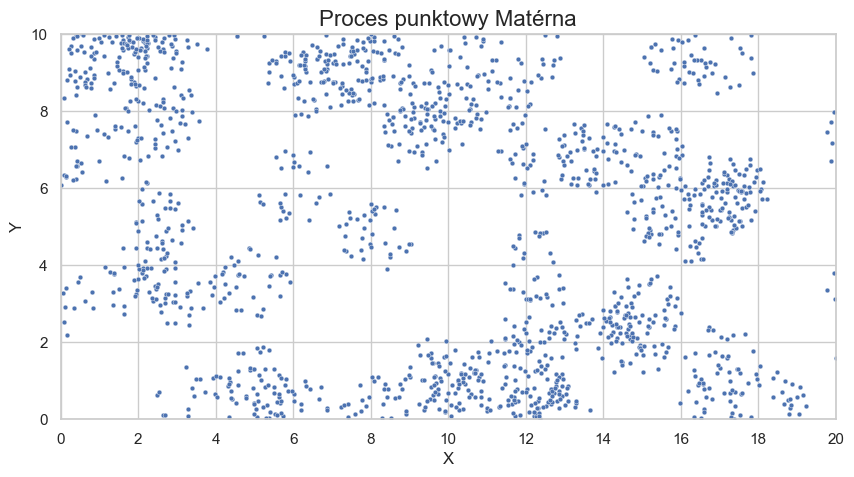

In [14]:
sns.scatterplot(data = df4, x = "X", y = "Y", s = 12)
res = plt.title("Proces punktowy Matérna", fontsize = 16)
res = plt.axis([0, 20, 0, 10])
res = plt.xticks(np.arange(0, 21, 2))

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [15]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    ext = cluster_sigma * 4
    a = (x_lim[1]-x_lim[0]+2*ext)*(y_lim[1]-y_lim[0]+2*ext)
    n = np.random.poisson(parent_intensity * a)
    x = np.random.uniform(x_lim[0]-ext, x_lim[1]+ext, n)
    y = np.random.uniform(y_lim[0]-ext, y_lim[1]+ext, n)

    X, Y = [], []

    for x, y in zip(x, y):
        n_c = np.random.poisson(mean_cluster_size)
        X.extend(np.random.normal(x, cluster_sigma, n_c))
        Y.extend(np.random.normal(y, cluster_sigma, n_c))
    
    df = pd.DataFrame({"X" : X, "Y" : Y})
    return df[(df["X"] > x_lim[0]) & (df["X"] < x_lim[1]) & (df["Y"] > y_lim[0]) & (df["Y"] < y_lim[1])]

#### b) Wygenerowanie procesu

In [16]:
df5 = thomas_on_rectangle(0.2, 30, 0.5, [0,20], [0, 10])

#### c) Wizualizacja

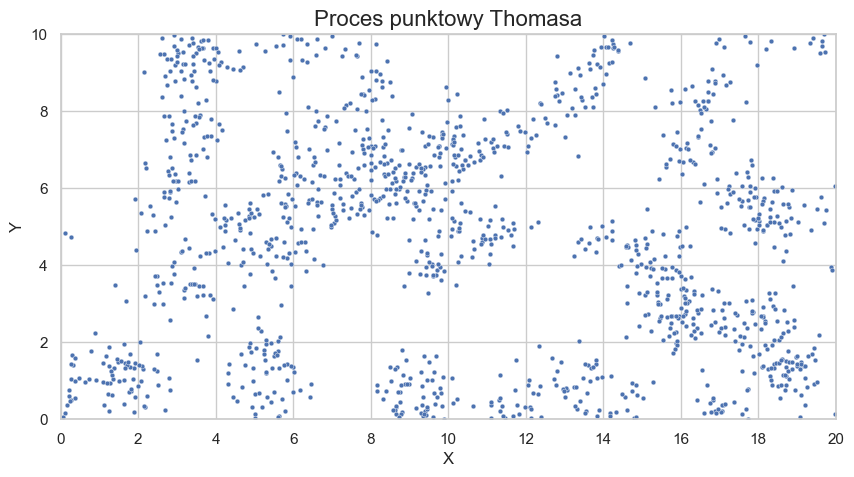

In [17]:
sns.scatterplot(data = df5, x = "X", y = "Y", s = 12)
res = plt.title("Proces punktowy Thomasa", fontsize = 16)
res = plt.axis([0, 20, 0, 10])
res = plt.xticks(np.arange(0, 21, 2))